In [26]:
import pandas as pd
import numpy as np

In [27]:
chunks = pd.read_csv('/mnt/c/Users/PC/Desktop/KSCHOOL_MASTER_DS/Downloadss/searches.csv.bz2', 
                    header = 0, 
                    sep = '^',
                    chunksize = 100000,
                    usecols = ['Date', 'Destination'])

In [ ]:
df = pd.DataFrame()
for chunk in chunks:
    chunk['count'] = np.ones(chunk.shape[0])
    a = chunk.groupby(['Date','Destination']).count()
    df = df.append(a)
df = df.groupby(['Date','Destination']).sum()

In [22]:
df.head(5)

""


In [ ]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.pivot('Date', 'Destination', 'count')
df.resample('1M').sum()





In [2]:
import pandas as pd
import numpy as np

In [46]:
chunks = pd.read_csv('/mnt/c/Users/PC/Desktop/KSCHOOL_MASTER_DS/Downloadss/searches.csv.bz2', 
                    header = 0, 
                    sep = '^',
                    chunksize = 100000,
                    usecols = ['Date', 'Destination'])

In [47]:
df = pd.DataFrame()
for chunk in chunks:
    
    chunk = chunk[chunk['Destination'].isin(['BCN', 'MAD', 'AGP'])]
    chunk['count'] = np.zeros(chunk.shape[0])
    chunk = chunk.groupby(['Date', 'Destination']).count()
    df = df.append(chunk)   

In [10]:
df.reset_index(inplace=True)

In [13]:
df

,Date,Destination,count
0,2013-04-11,AGP,5
1,2013-04-11,BCN,17
2,2013-04-11,MAD,14
3,2013-04-12,AGP,10
4,2013-04-12,BCN,20
...,...,...,...
61142,2013-10-12,BCN,14
61143,2013-10-12,MAD,15
61144,2013-10-13,AGP,3
61145,2013-10-13,BCN,15


In [48]:
df = df.groupby(['Date', 'Destination']).count()


In [49]:
df.reset_index(inplace=True)


In [50]:
df

,Date,Destination,count
0,2013-01-01,AGP,57
1,2013-01-01,BCN,57
2,2013-01-01,MAD,57
3,2013-01-02,AGP,58
4,2013-01-02,BCN,58
...,...,...,...
1070,2013-12-24,BCN,57
1071,2013-12-24,MAD,57
1072,2013-12-25,AGP,56
1073,2013-12-25,BCN,56


In [51]:
df = df.pivot('Date', 'Destination', 'count')

In [52]:
df.index = pd.to_datetime(df.index)

In [53]:
df

Destination,AGP,BCN,MAD
Date,,,
2013-01-01,57.0,57.0,57.0
2013-01-02,58.0,58.0,57.0
2013-01-03,57.0,57.0,57.0
2013-01-04,58.0,58.0,58.0
2013-01-05,57.0,57.0,58.0
...,...,...,...
2013-12-21,56.0,57.0,57.0
2013-12-22,57.0,57.0,56.0
2013-12-23,56.0,56.0,56.0


In [54]:
df = df.resample('1M').sum()

In [55]:
df

Destination,AGP,BCN,MAD
Date,,,
2013-01-31,1772.0,1781.0,1781.0
2013-02-28,1604.0,1610.0,1608.0
2013-03-31,1778.0,1780.0,1777.0
2013-04-30,1720.0,1726.0,1723.0
2013-05-31,1775.0,1779.0,1781.0
2013-06-30,1715.0,1723.0,1724.0
2013-07-31,1777.0,1781.0,1782.0
2013-08-31,1774.0,1780.0,1778.0
2013-09-30,1720.0,1724.0,1719.0


In [56]:
from matplotlib import pyplot as plt
%matplotlib notebook


In [57]:
df = df[:-1]



In [58]:
df

Destination,AGP,BCN,MAD
Date,,,
2013-01-31,1772.0,1781.0,1781.0
2013-02-28,1604.0,1610.0,1608.0
2013-03-31,1778.0,1780.0,1777.0
2013-04-30,1720.0,1726.0,1723.0
2013-05-31,1775.0,1779.0,1781.0
2013-06-30,1715.0,1723.0,1724.0
2013-07-31,1777.0,1781.0,1782.0
2013-08-31,1774.0,1780.0,1778.0
2013-09-30,1720.0,1724.0,1719.0


In [44]:
df = df.apply(lambda x: np.cumsum(x) / 1000, axis=0)

In [63]:
df['BCN-MAD'] = df['BCN']-df['MAD']
df['BCN-AGP'] = df['BCN']-df['AGP']
df

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Destination,AGP,BCN,MAD,BCN-MAD,BCN-AGP
Date,,,,,
2013-01-31,1772.0,1781.0,1781.0,0.0,9.0
2013-02-28,1604.0,1610.0,1608.0,2.0,6.0
2013-03-31,1778.0,1780.0,1777.0,3.0,2.0
2013-04-30,1720.0,1726.0,1723.0,3.0,6.0
2013-05-31,1775.0,1779.0,1781.0,-2.0,4.0
2013-06-30,1715.0,1723.0,1724.0,-1.0,8.0
2013-07-31,1777.0,1781.0,1782.0,-1.0,4.0
2013-08-31,1774.0,1780.0,1778.0,2.0,6.0
2013-09-30,1720.0,1724.0,1719.0,5.0,4.0


<IPython.core.display.Javascript object>


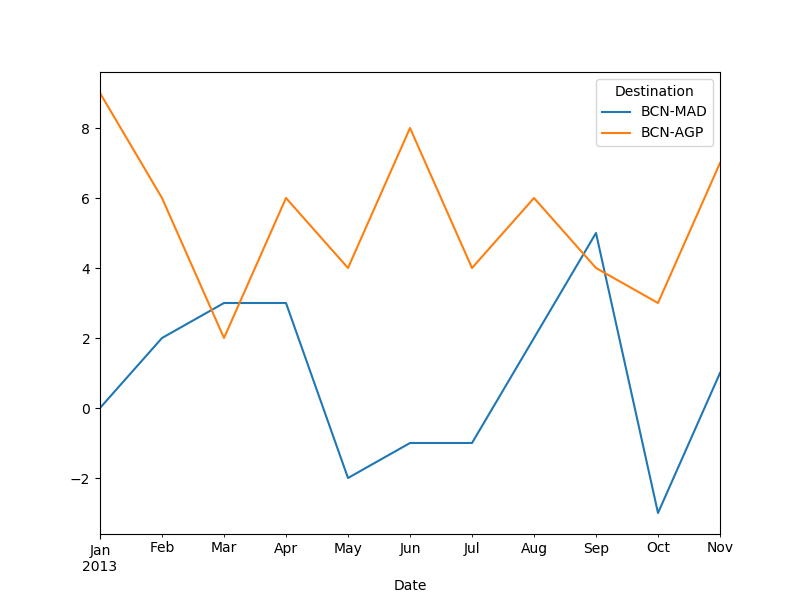

In [65]:
df[['BCN-MAD','BCN-AGP']].plot(figsize=(8,6))

<IPython.core.display.Javascript object>


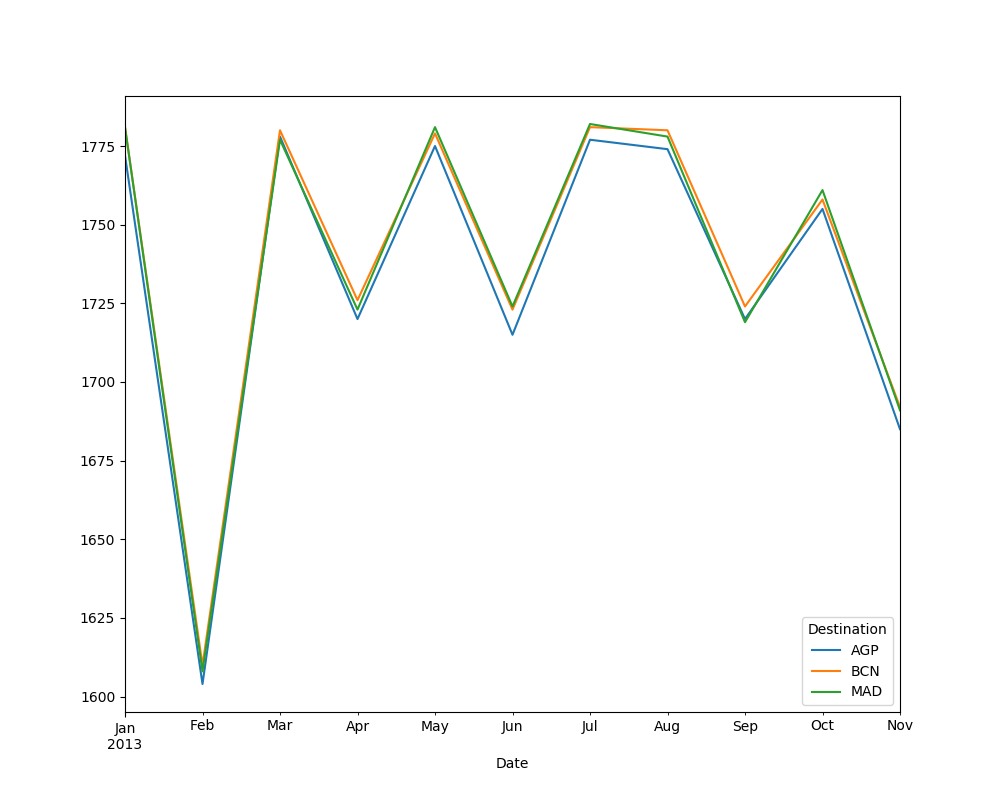

In [62]:
df.plot(figsize=(10, 8))